<div style="background-color : Blue">
    <p style ="text-align : center; color : red; font-size : 30px; margin : auto;padding : 30PX">Projet bonheur</p></div>

# Importation des librairies

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 

# Importation du fichier csv

In [2]:
df=pd.read_csv("Rapport-bonheur.csv")

# Regardons le fichier

In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


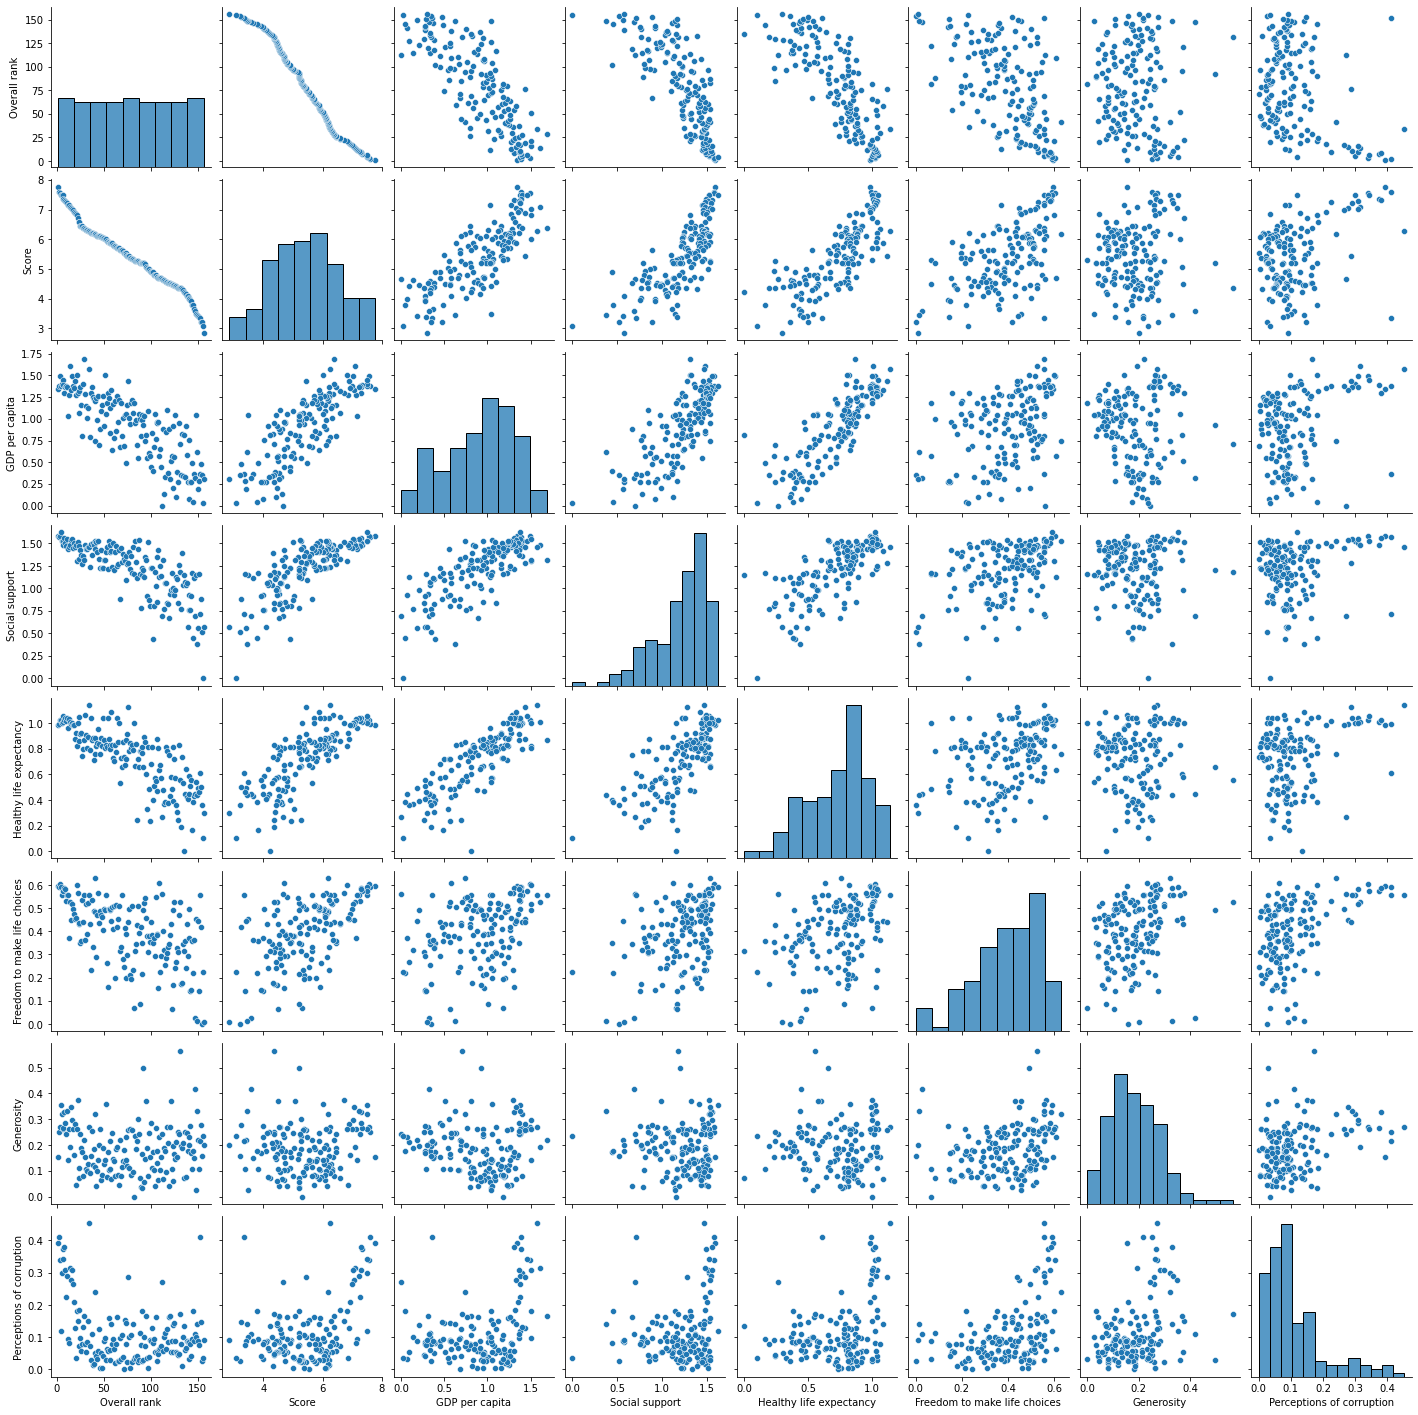

In [7]:
sns.pairplot(df)

<AxesSubplot:>

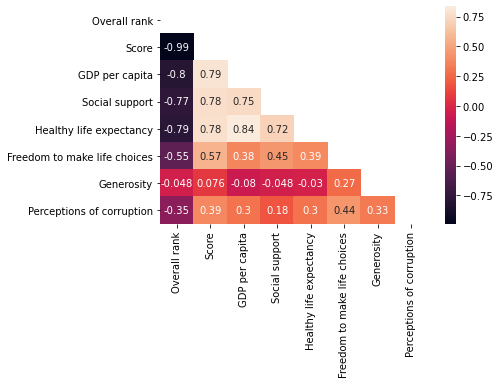

In [12]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask= matrix)

In [29]:
text=' '.join([df['Country or region'][i] for i in range(df.shape[0])])

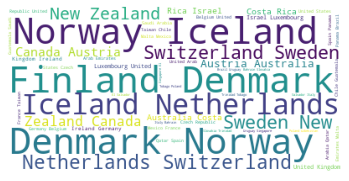

In [33]:
wordcloud = WordCloud(background_color = 'white', max_words = 50, collocation_threshold = 4).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()